## Imports

In [87]:
import pandas as pd
import numpy as np
import re
import nltk
import string

In [88]:
!python preprocessing_functions.py

python: can't open file 'preprocessing_functions.py': [Errno 2] No such file or directory


## Text reading & extracting information

In [89]:
dfRaw = pd.read_csv('NLP_project_kickoff_data.csv')
dfRaw.iloc[0]

Unnamed: 0                                                          0
account                                                dr_hazem_alfie
caption             I am Dr Hazem Alfie, Plastic and Cosmetic Surg...
profile_name                                                      NaN
biography                                                         NaN
id                                              2683060000000000000.0
following                                                           2
likes                                                              15
posts_count                                                         1
followers                                                          28
is_verified                                                         0
datetime                                                   1634065389
image_url           j_kvihwg0g1c283e3byk.0f2035486e2f1b57c59707ec9...
url                          https://www.instagram.com/p/CU8IoDEr-x3/
comments            

## Exploration

1. likes/followers - ER
2. Considering only those accounts who have more than 100 posts. 
3. Considering the number of likes in the past k days.
4. two ways for feature processing - 
    a. Considering only last k post per user
    b. Considering all the posts of the past and deriving (L-k) features in repetivive manner.
5. 

In [90]:
def check_nanColumns(dfRaw):
    nan_col = []
    cols = list(dfRaw.columns)
    for col in cols:
        if dfRaw[col].isnull().values.any() == True:
            nan_col.append(col)
    return nan_col

cols = list(dfRaw.columns)
print(cols)

['Unnamed: 0', 'account', 'caption', 'profile_name', 'biography', 'id', 'following', 'likes', 'posts_count', 'followers', 'is_verified', 'datetime', 'image_url', 'url', 'comments', 'video_view_count', 'video_url', 'timestamp', 'adultScore', 'racyScore', 'goreScore', 'isBWImg', 'clipArtType', 'lineDrawingType', 'tokens']


In [91]:
dfRaw.drop(['Unnamed: 0', 'profile_name','biography', 'id', 'comments', 'image_url', 'url', 'comments', 'video_view_count','video_url', 'adultScore', 'goreScore', 'racyScore', 'isBWImg', 'clipArtType', 'lineDrawingType'], axis = 1, inplace = True)

In [92]:
cols = list(dfRaw.columns)
nan_cols = (check_nanColumns(dfRaw))
print(' Total columns: ', cols,'\n','Columns containing nan values: ', nan_cols) #if the columns where nan is accepted, can be dealt here.
print('Shape of dataframe: ', dfRaw.shape)

 Total columns:  ['account', 'caption', 'following', 'likes', 'posts_count', 'followers', 'is_verified', 'datetime', 'timestamp', 'tokens'] 
 Columns containing nan values:  ['caption']
Shape of dataframe:  (519, 10)


In [93]:
#Removing the nan rows from all the columns:
dfRaw = dfRaw.dropna()
print("New shape after removing nan: ", dfRaw.shape)


New shape after removing nan:  (512, 10)


In [95]:
dfRaw.head()

,account,caption,following,likes,posts_count,followers,is_verified,datetime,timestamp,tokens
0,dr_hazem_alfie,"I am Dr Hazem Alfie, Plastic and Cosmetic Surg...",2,15,1,28,0,1634065389,2021-11-02T19:40:32.981Z,"['White', 'human', 'face', 'person', 'smile', ..."
1,british_face_clinic,British Face Clinic is offering free facial co...,106,10,4,56,0,1542635007,2021-11-02T19:40:36.300Z,"['White', 'Grey', 'text', 'human', 'face', 'fa..."
2,british_face_clinic,"Need fuller lips? Consider PermaLipâ„¢\n""Lip I...",106,9,4,56,0,1543377164,2021-11-02T19:40:36.300Z,"['White', 'skin', 'lip', 'closeup', 'eyelash',..."
3,british_face_clinic,A recent successful Rhinoplasty procedure resu...,106,7,4,56,0,1542967109,2021-11-02T19:40:36.300Z,"['White', 'Grey', 'text', 'screenshot', 'dog',..."
4,dr_danmarsh,Tummytuck at 6 months post op. Final results t...,109,2778,309,72047,1,1600373084,2021-11-02T19:40:32.890Z,"['Brown', 'Black', 'Pink', 'undergarment', 'cl..."


In [100]:
colsUser = ['account','following','posts_count', 'followers','is_verified']
colsPost = ['account','caption', 'likes', 'datetime', 'timestamp', 'tokens']

In [101]:
dfUser = dfRaw[colsUser]
dfPost = dfRaw[colsPost]
dfUser.head()

,account,following,posts_count,followers,is_verified
0,dr_hazem_alfie,2,1,28,0
1,british_face_clinic,106,4,56,0
2,british_face_clinic,106,4,56,0
3,british_face_clinic,106,4,56,0
4,dr_danmarsh,109,309,72047,1


In [102]:
dfPost.head()

,account,caption,likes,datetime,timestamp,tokens
0,dr_hazem_alfie,"I am Dr Hazem Alfie, Plastic and Cosmetic Surg...",15,1634065389,2021-11-02T19:40:32.981Z,"['White', 'human', 'face', 'person', 'smile', ..."
1,british_face_clinic,British Face Clinic is offering free facial co...,10,1542635007,2021-11-02T19:40:36.300Z,"['White', 'Grey', 'text', 'human', 'face', 'fa..."
2,british_face_clinic,"Need fuller lips? Consider PermaLipâ„¢\n""Lip I...",9,1543377164,2021-11-02T19:40:36.300Z,"['White', 'skin', 'lip', 'closeup', 'eyelash',..."
3,british_face_clinic,A recent successful Rhinoplasty procedure resu...,7,1542967109,2021-11-02T19:40:36.300Z,"['White', 'Grey', 'text', 'screenshot', 'dog',..."
4,dr_danmarsh,Tummytuck at 6 months post op. Final results t...,2778,1600373084,2021-11-02T19:40:32.890Z,"['Brown', 'Black', 'Pink', 'undergarment', 'cl..."


In [103]:
#Removing duplicates from the dfUser & dfPost
# 'account' works as key for both the dataframes
print('Shapes before dropping the duplicates in dfPost and dfUser: ', dfPost.shape, dfUser.shape)
dfPost.drop_duplicates(inplace=True)
dfUser.drop_duplicates(inplace=True)
print('Shapes after dropping the duplicates in dfPost and dfUser: ', dfPost.shape, dfUser.shape) 

Shapes before dropping the duplicates in dfPost and dfUser:  (512, 6) (512, 5)
Shapes after dropping the duplicates in dfPost and dfUser:  (512, 6) (110, 5)


<ipython-input-103-88b4e7660895>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPost.drop_duplicates(inplace=True)
<ipython-input-103-88b4e7660895>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUser.drop_duplicates(inplace=True)


## Insights in UserData

In [105]:
dfUser.head()

,account,following,posts_count,followers,is_verified
0,dr_hazem_alfie,2,1,28,0
1,british_face_clinic,106,4,56,0
4,dr_danmarsh,109,309,72047,1
7,atherton.duncan,595,121,986,0
8,georgina_bst,304,611,1785,0


<AxesSubplot:xlabel='account', ylabel='followers'>

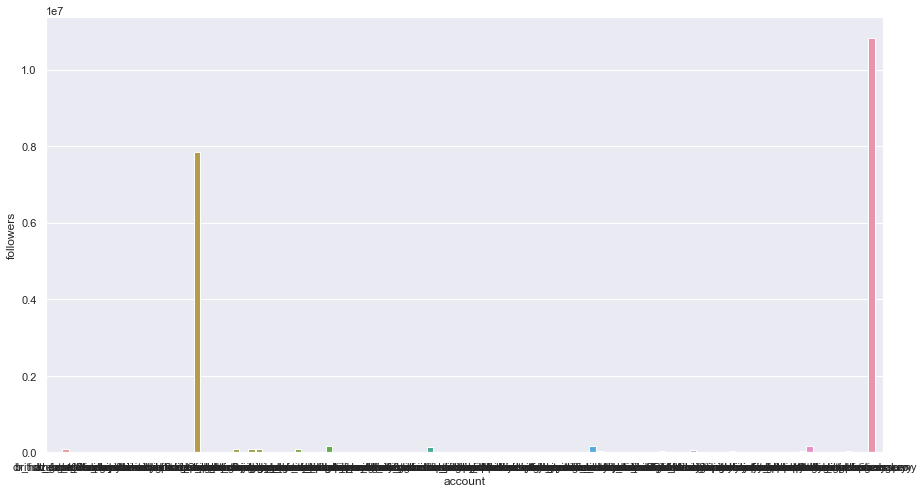

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
# plt.plot(plotsize = (10,50))

def plot_or_die(vertical):
    sns.set(rc = {'figure.figsize':(15,8)})
    sns.barplot(x = 'account', y = 'followers', data = dfUser)

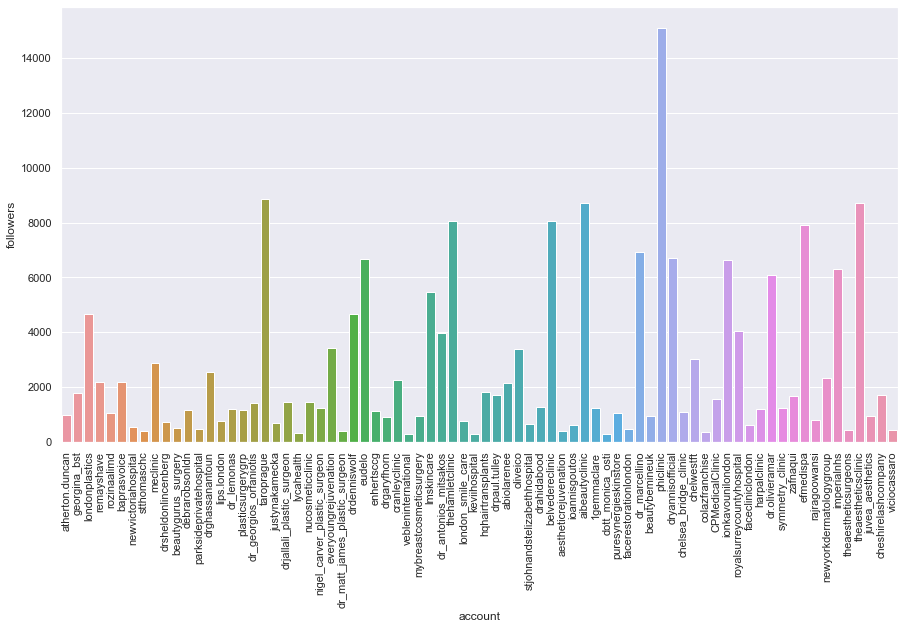

In [119]:
#observing quantiled date 
quantUser_hi = dfUser['followers'].quantile(.80)
quantUser_lo = dfUser['followers'].quantile (.10)
dfUserFiltered = dfUser[(dfUser["followers"] < quantUser_hi) & (dfUser["followers"] > quantUser_lo)]
plot = sns.barplot(x = 'account', y = 'followers', data = dfUserFiltered)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90);